table of contents  
1. Prepare  
2. Dataset Reading, and Preprocess  
3. Calc Pitch Control Impact, and visualize

# Prepare

## Import Library

In [1]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Define Static Parameter

In [5]:
base_dir = os.path.join('..')
fig_dir = os.path.join(base_dir, 'reports', 'figure')
data_dir = os.path.join(base_dir, '..', 'sample-data', 'data')
game_id = 2

sys.path.append(os.path.join(base_dir, 'src'))
import Metrica_IO as mio
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
from PlayerPitchControlAnalysis import PlayerPitchControlAnalysisPlayer

# Dataset Reading, and Preprocess

In [7]:
# read in the event data
events_df = mio.read_event_data(data_dir, game_id)

# read in tracking data
tracking_home_df = mio.tracking_data(data_dir, game_id, "Home")
tracking_away_df = mio.tracking_data(data_dir, game_id, "Away")

# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home_df = mio.to_metric_coordinates(tracking_home_df)
tracking_away_df = mio.to_metric_coordinates(tracking_away_df)
events_df = mio.to_metric_coordinates(events_df)

# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home_df, tracking_away_df, events_df = mio.to_single_playing_direction(
    tracking_home_df, tracking_away_df, events_df
)

# Calculate player velocities
tracking_home_df = mvel.calc_player_velocities(tracking_home_df, smoothing=True, filter_='moving average')
tracking_away_df = mvel.calc_player_velocities(tracking_away_df, smoothing=True, filter_='moving average')

Reading team: home
Reading team: away


# Calc Pitch Control Impact, and visualize

In [15]:
params = mpc.default_model_params(3)

## region Away Player 19 analysis

In [8]:
example_player_analysis_away = PlayerPitchControlAnalysisPlayer(
    tracking_home=tracking_home_df,
    tracking_away=tracking_away_df,
    params=params,
    events=events_df,
    event_id=820,
    team_player_to_analyze="Away",
    player_to_analyze=19,
    field_dimens=(106.0, 68.0),
    n_grid_cells_x=50,
)

In [9]:
# First, let's look at the amount of space the player created with his/her off ball run
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " created "
    + str(
        int(
            example_player_analysis_away.calculate_space_created(
                replace_function="movement", replace_x_velocity=0, replace_y_velocity=0
            )
        )
    )
    + " m^2 of space with his movement during event "
    + str(example_player_analysis_away.event_id)
)

Away Player 19 created 62 m^2 of space with his movement during event 820


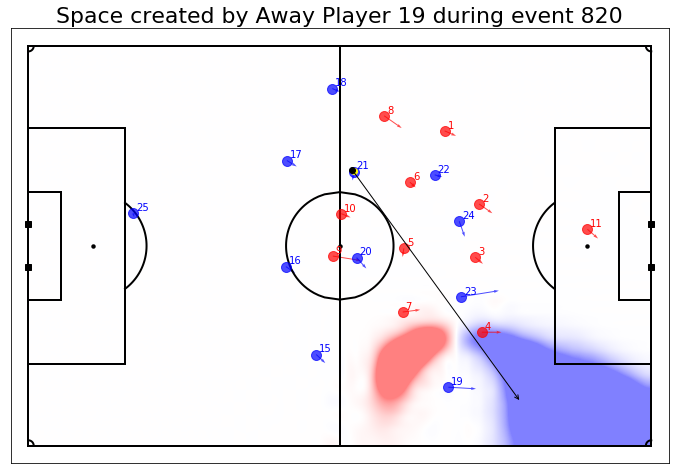

In [10]:
# Now, let's plot the space created and conceded by his run
example_player_analysis_away.plot_pitch_control_difference(
    replace_function="movement", replace_x_velocity=0, replace_y_velocity=0
)

In [11]:
# Let's look at the space the player is gaining by being on the right wing
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " occupied "
    + str(
        int(
            example_player_analysis_away.calculate_space_created(
                replace_function="presence"
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_away.event_id)
)

Away Player 19 occupied 371 m^2 of space during event 820


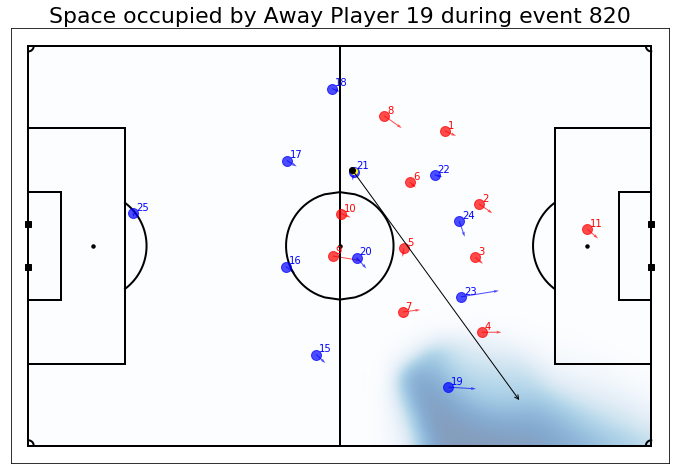

In [12]:
example_player_analysis_away.plot_pitch_control_difference(replace_function="presence")

In [13]:
# Finally, let's examine what would happen if we moved the player 10 meters towards the middle of the pitch
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " would have occupied a difference of "
    + str(
        int(
            -1
            * example_player_analysis_away.calculate_space_created(
                replace_function="location", relative_x_change=0, relative_y_change=10
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_away.event_id)
    + " if they were 10 meters towards the center of the pitch"
)

Away Player 19 would have occupied a difference of -160 m^2 of space during event 820 if they were 10 meters towards the center of the pitch


Plotting new location


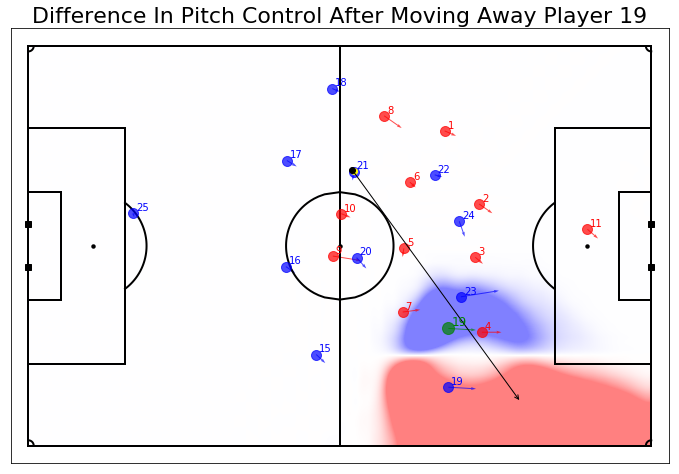

In [14]:
example_player_analysis_away.plot_pitch_control_difference(
    replace_function="location", relative_x_change=0, relative_y_change=10
)

## Let's do the same analysis for Home Player 4:

In [17]:
example_player_analysis_home = PlayerPitchControlAnalysisPlayer(
    tracking_home=tracking_home_df,
    tracking_away=tracking_away_df,
    params=params,
    events=events_df,
    event_id=820,
    team_player_to_analyze="Home",
    player_to_analyze=4,
    field_dimens=(106.0, 68.0),
    n_grid_cells_x=50,
)

In [18]:
# Let's calculate the amount of space the player is gaining by running towards his own goal

print(
    example_player_analysis_home.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " created "
    + str(
        int(
            example_player_analysis_home.calculate_space_created(
                replace_function="movement", replace_x_velocity=0, replace_y_velocity=0
            )
        )
    )
    + " m^2 of space with his movement during event "
    + str(example_player_analysis_home.event_id)
)

Home Player 19 created 49 m^2 of space with his movement during event 820


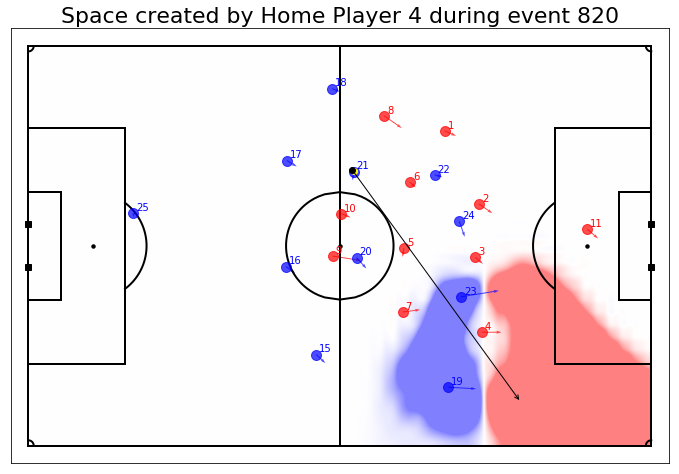

In [19]:
# And plot the space gained and conceded:

example_player_analysis_home.plot_pitch_control_difference(
    replace_function="movement", replace_x_velocity=0, replace_y_velocity=0
)

In [20]:
# Overall space creation analysis:

print(
    example_player_analysis_home.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_home.player_to_analyze)
    + " occupied "
    + str(
        int(
            example_player_analysis_home.calculate_space_created(
                replace_function="presence"
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_home.event_id)
)

Home Player 4 occupied 293 m^2 of space during event 820


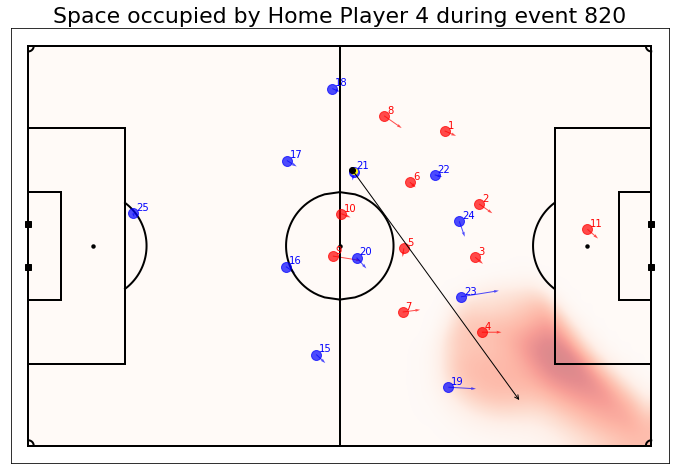

In [21]:
# And plot this space on the pitch:

example_player_analysis_home.plot_pitch_control_difference(replace_function="presence")

In [22]:
# Let's see what happens if we move this defender 5 meters closer to Forward 23:

print(
    example_player_analysis_home.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_home.player_to_analyze)
    + " would have occupied a difference of "
    + str(
        int(
            -1
            * example_player_analysis_home.calculate_space_created(
                replace_function="location", relative_x_change=0, relative_y_change=5
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_home.event_id)
    + " if they were 5 meters towards the center of the pitch"
)

Home Player 4 would have occupied a difference of -124 m^2 of space during event 820 if they were 5 meters towards the center of the pitch


Plotting new location


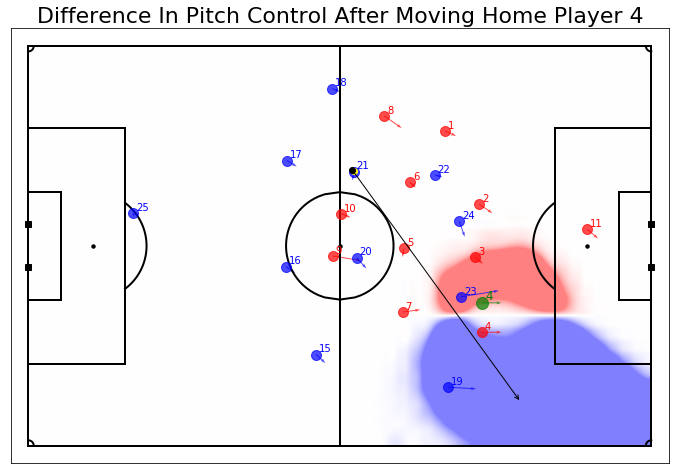

In [23]:
example_player_analysis_home.plot_pitch_control_difference(
    replace_function="location", relative_x_change=0, relative_y_change=5
)